In [1]:
setwd("~/Documents/Upd-Germline")
source("_targets.R")

line_cmap <- c(chic_line_track_colors$germline, chic_line_track_colors$somatic, hcl(50, 102, 57), hcl(255, 102, 57))

library(forcats)

tar_load(chic.tile.diameter_1000_chr | repli.peaks_chr)
tar_load(matches("repli.timing_.*chr$"))
tar_load(chromosome_pericetromere_label)

Loading required package: viridisLite


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'glmGamPoi'


The following object is masked from 'package:dplyr':

    vars



Attaching package: 'purrr'


The following object is masked from 'package:magrittr':

    set_names


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'matrixStats'


The following object is masked from 'package:dplyr':

    count



Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, c

In [2]:
chromosome_pericetromere_label

GRanges object with 4 ranges and 0 metadata columns:
      seqnames            ranges strand
         <Rle>         <IRanges>  <Rle>
  [1]       2L 22192401-23513712      *
  [2]       2R         1-5651400      *
  [3]       3L 23154101-28110227      *
  [4]       3R         1-4229200      *
  -------
  seqinfo: 4 sequences from an unspecified genome; no seqlengths

In [3]:
enframe(chr.lengths/1000/1000)

name,value
<chr>,<dbl>
2L,23.513712
2R,25.286936
3L,28.110227
3R,32.079331
4,1.348131
X,23.542271
Y,3.667352


In [4]:
repli.peaks_chr[[6]]

GRanges object with 766 ranges and 2 metadata columns:
                                                      seqnames        ranges
                                                         <Rle>     <IRanges>
                          2L.Kc167Later                     2L   34001-70000
                      2L.Kc167Earlier.1                     2L 138001-233000
                      2L.Kc167Earlier.2                     2L 527001-590000
                        2L.Kc167Later.3                     2L 625001-650000
                        2L.Kc167Later.4                     2L 669001-789000
                                    ...                    ...           ...
  Unmapped_Scaffold_38_D1625.Kc167Later Unmapped_Scaffold_38..       1-28305
  Y_mapped_Scaffold_12_D1771.Kc167Later Y_mapped_Scaffold_12..       1-66439
  Y_mapped_Scaffold_18_D1698.Kc167Later Y_mapped_Scaffold_18..       1-34521
  Y_mapped_Scaffold_23_D1638.Kc167Later Y_mapped_Scaffold_23..       1-31460
             21100002

In [5]:
names(repli.peaks_chr)

[1] "Germline_Somatic"     "Germline_Kc167"       "Germline_S2"         
[4] "Somatic_Kc167"        "Somatic_S2"           "Kc167_S2"            
[7] "Dynamic_Static_Model"

In [6]:
repli.peaks_chr[c(2, 4, 6)] <- repli.peaks_chr[c(2, 4, 6)] %>%
  sapply(
    \(gr) gr[!grepl("^Y", seqnames(gr))],
    simplify=F
  )

In [7]:
tail(repli.peaks_chr[[6]])

GRanges object with 6 ranges and 2 metadata columns:
                                                         seqnames
                                                            <Rle>
                          X.Kc167Later.115                      X
  3Cen_mapped_Scaffold_41_D1641.Kc167Later 3Cen_mapped_Scaffold..
     Unmapped_Scaffold_13_D1782.Kc167Later Unmapped_Scaffold_13..
     Unmapped_Scaffold_35_D1599.Kc167Later Unmapped_Scaffold_35..
     Unmapped_Scaffold_38_D1625.Kc167Later Unmapped_Scaffold_38..
                211000022278415.Kc167Later        211000022278415
                                                      ranges strand |   NegDiff
                                                   <IRanges>  <Rle> | <numeric>
                          X.Kc167Later.115 22876001-23194000      * | -1.278509
  3Cen_mapped_Scaffold_41_D1641.Kc167Later           1-22604      * | -0.571954
     Unmapped_Scaffold_13_D1782.Kc167Later           1-25537      * | -0.448105
     Unmapped_Scaff


Attaching package: 'ggplot2'


The following object is masked from 'package:glmGamPoi':

    vars




name,value
<chr>,<dbl>
Germline_Somatic,40.15274
Germline_Kc167,62.40064
Germline_S2,47.92323
Somatic_Kc167,41.27192
Somatic_S2,38.69367
Kc167_S2,62.76540
Dynamic_Static_Model,124.11531


,Germline,Somatic,Kc167,S2
Germline,0.0000000,0.2793700,0.4341639,0.3334346
Somatic,0.2793700,0.0000000,0.2871569,0.2692183
Kc167,0.4341639,0.2871569,0.0000000,0.4367018
S2,0.3334346,0.2692183,0.4367018,0.0000000


,Germline,Somatic,Kc167,S2
Germline,0.0000000,0.1043001,0.1528325,0.1589500
Somatic,0.1750700,0.0000000,0.1389171,0.1553411
Kc167,0.2813314,0.1482398,0.0000000,0.1043001
S2,0.1744846,0.1138771,0.1917491,0.0000000


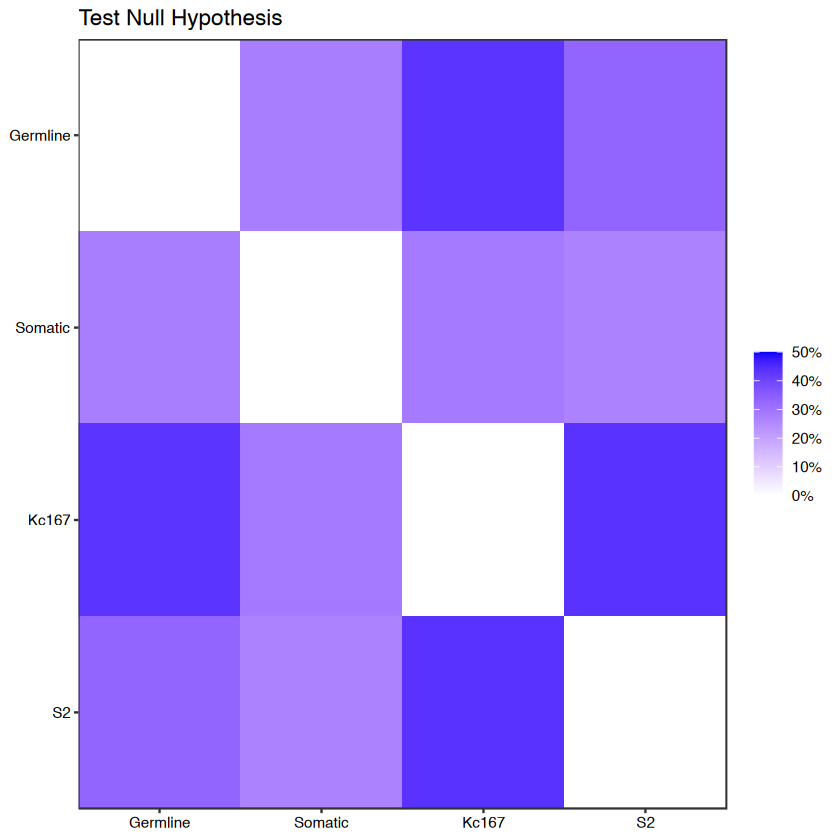

In [9]:
library(ggplot2)
sapply(repli.peaks_chr, \(gr) sum(width(gr))/1000/1000) %>%
  enframe()
difftime <- sapply(repli.peaks_chr, \(gr) sum(width(gr))/sum(seqlengths(chic.tile.diameter_1000_chr)))[
  c(
    NA, 1, 2, 3,
    1, NA, 4, 5,
    2, 4, NA, 6,
    3, 5, 6, NA
  )
] %>%
  replace(is.na(.), 0) %>%
  matrix(nrow = 4, byrow = TRUE)
early1 <- sapply(repli.peaks_chr, \(gr) sum(width(gr)[grepl("Earlier", names(gr))])/sum(seqlengths(chic.tile.diameter_1000_chr)))[
  c(
    NA, NA, NA, NA,
    1, NA, NA, NA,
    2, 4, NA, NA,
    3, 5, 6, NA
  )
] %>%
  replace(is.na(.), 0) %>%
  matrix(nrow = 4, byrow = TRUE)
late1 <- sapply(repli.peaks_chr, \(gr) sum(width(gr)[grepl("Later", names(gr))])/sum(seqlengths(chic.tile.diameter_1000_chr)))[
  c(
    NA, 1, 2, 3,
    NA, NA, 4, 5,
    NA, NA, NA, 1,
    NA, NA, NA, NA
  )
] %>%
  replace(is.na(.), 0) %>%
  matrix(nrow = 4, byrow = TRUE)
earlytime <- early1 + late1
dimnames(difftime) <- rep(list(c("Germline", "Somatic", "Kc167", "S2")), 2)
dimnames(earlytime) <- rep(list(c("Germline", "Somatic", "Kc167", "S2")), 2)
difftime
earlytime
difftime_plot <- ggplot(
  melt(difftime),
  aes(Var1, Var2, fill=value)
) +
  geom_tile() +
  scale_y_discrete(limits=rev) +
  coord_cartesian(expand=F) +
  scale_fill_gradient(
    NULL, limits=c(0, 0.5),
    low = "white", high = "blue",
    labels = scales::percent
  ) +
  labs(title = "Test Null Hypothesis", x=NULL, y=NULL)
earlytime_plot <- ggplot(
  melt(earlytime),
  aes(Var1, Var2, fill=value)
) +
  geom_tile() +
  scale_y_discrete(limits=rev) +
  coord_cartesian(expand=F) +
  scale_fill_gradient(
    NULL, limits=c(0, 0.5),
    low = "white", high = "blue",
    labels = scales::percent
  ) +
  labs(title = "Test Null Hypothesis (By Sign)", x="Earlier Cell Type", y="Later Cell Type")
difftime_plot

In [10]:
sum(width(repli.peaks_chr[[1]])[grepl("Earlier", names(repli.peaks_chr[[1]]))])
sum(width(repli.peaks_chr[[1]])[grepl("Later", names(repli.peaks_chr[[1]]))])
sum(width(repli.peaks_chr[[3]])[grepl("Earlier", names(repli.peaks_chr[[1]]))])
sum(width(repli.peaks_chr[[3]])[grepl("Later", names(repli.peaks_chr[[1]]))])

[1] 25162104

[1] 14990634

[1] 30911090

[1] 17012137

In [11]:
Y <- tibble(
  chr = names(chr.lengths),
  xmin = 2500,
  xmax = floor((chr.lengths - 2500) / 5000) * 5000,
  Germline = list(repli.timing_Germline_chr),
  Somatic = list(repli.timing_Somatic_chr),
  Kc167 = list(repli.timing_Kc167_chr),
  S2 = list(repli.timing_S2_chr),
) %>%
  group_by(chr, xmin, xmax) %>%
  reframe(
    x = seq(xmin, xmax, by = 5000),
    region = (
      as.character(chr) %>%
        paste0(
          replace(
            rep("", length(x)),
            chromosome_pericetromere_label %>%
              findOverlaps(
                GRanges(
                  chr,
                  IRanges(x, width=1),
                  seqlengths = seqlengths(repli.timing_Germline_chr)
                )
              ) %>%
              to(),
            "C"
          )
        ) %>%
      factor(
        c("2L", "2LC", "2RC", "2R", "3L", "3LC", "3RC", "3R", "4", "X", "Y", "rDNA")
      )
    ),
    across(
      !matches("^(x|region)$"),
      list(
        LOESS = ~ (
          loess(
            y.track ~ x.track,
            tibble(
              x.track = .x[[1]][seqnames(.x[[1]]) == chr] %>% mid(),
              y.track = .x[[1]][seqnames(.x[[1]]) == chr]$score,
            ),
            span = 0.025
          ) %>%
          predict(tibble(x.track = x))
        )
      )
    )
  ) %>%
  subset(select = -c(xmin, xmax))

In [12]:
rDNA <- mapply(
  \(gr, v_orig) (
    (
      gr[
        seqnames(gr) == "rDNA" &
          between(mid(gr), 37000, 77000)
      ]$score %>%
        mean()
    ) -
      mean(v_orig)
  ) /
    sd(v_orig),
  list(
    repli.timing_Germline_chr,
    repli.timing_Somatic_chr,
    repli.timing_Kc167_chr,
    repli.timing_S2_chr
  ),
  Y[
    c("Germline_LOESS", "Somatic_LOESS", "Kc167_LOESS", "S2_LOESS")
  ]
)
Y <- rbind(
  Y,
  tibble(
    chr = "rDNA",
    x = 57000,
    region = "rDNA",
    as_tibble(
      setNames(
        as.list(rDNA),
        colnames(Y)[4:7]
      )
    )
  )
)
tail(Y)

chr,x,region,Germline_LOESS,Somatic_LOESS,Kc167_LOESS,S2_LOESS
<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Y,3637500,Y,-0.2551883,-0.2256387,-0.7050496,-0.4268229
Y,3642500,Y,-0.2519863,-0.2102737,-0.6260181,-0.3906424
Y,3647500,Y,-0.2497008,-0.1900902,-0.5144327,-0.3388503
Y,3652500,Y,-0.2511598,-0.1643056,-0.3685433,-0.2707145
Y,3657500,Y,-0.2629694,-0.1327978,-0.1852171,-0.1852090
rDNA,57000,rDNA,1.2700077,-1.5555987,-1.9353602,-2.7976166


In [13]:
Y[Y$chr == "Y", 4:7] <- (
  Y[Y$chr == "Y", c(4, 5, 7)] %>%
    as.matrix() %>%
    `%*%`(
      matrix(
        c(
          1, 0, 0,
          0, 1, 0,
          NA, NA, NA,
          0, 0, 1
        ),
        nrow = 3,
        dimnames = list(
          NULL,
          colnames(Y)[4:7]
        )
      )
    )
)
tail(Y)

chr,x,region,Germline_LOESS,Somatic_LOESS,Kc167_LOESS,S2_LOESS
<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Y,3637500,Y,-0.2551883,-0.2256387,NA,-0.4268229
Y,3642500,Y,-0.2519863,-0.2102737,NA,-0.3906424
Y,3647500,Y,-0.2497008,-0.1900902,NA,-0.3388503
Y,3652500,Y,-0.2511598,-0.1643056,NA,-0.2707145
Y,3657500,Y,-0.2629694,-0.1327978,NA,-0.1852090
rDNA,57000,rDNA,1.2700077,-1.5555987,-1.93536,-2.7976166


In [14]:
write.table(
  cbind(
    Y[c("chr", "region", "x")],
    round(as.matrix(Y[4:7]), digits=3)
  ),
  "illustrations/Replication_Bayes_LOESS.tsv",
  quote = F,
  sep = "\t",
  row.names = F,
  na = ""
)


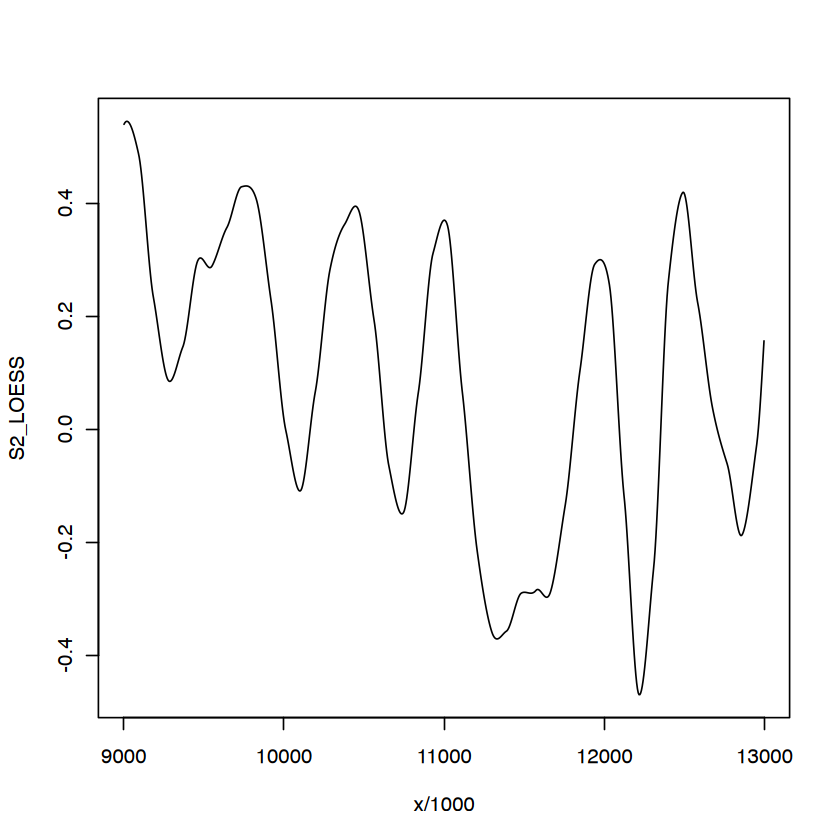

In [15]:
with(subset(Y, region == "2L" & between(x, 9*1000*1000, 13*1000*1000)), plot(x/1000, S2_LOESS, type='l'))


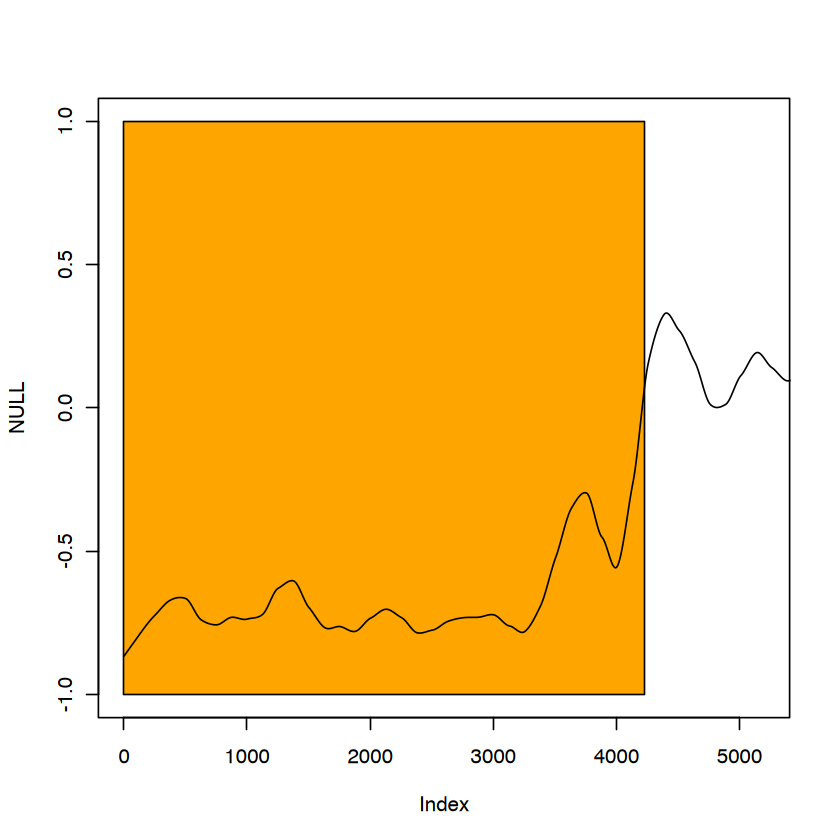

In [16]:
plot(NULL, xlim=c(1, 5200), ylim=c(-1, 1))
rect(xleft=1, ybottom=-1, xright=4229, ytop=1, col="orange")
with(subset(Y, chr == "3R" & between(x, 1, 6.5*1000*1000)), lines(x/1000, S2_LOESS))


In [17]:
YS <- Y[
  c("Germline_LOESS", "Somatic_LOESS", "Kc167_LOESS", "S2_LOESS")
] %>%
  as.matrix() %>%
  scale() %>%
  t() %>%
  scale() %>%
  t()
YS[Y$chr == "Y", ] <- (
  YS[Y$chr == "Y", c(1, 2, 4)] %>%
    t() %>%
    scale() %>%
    t() %>%
    `%*%`(
      matrix(
        c(
          1, 0, 0,
          0, 1, 0,
          0, 0, 0,
          0, 0, 1
        ),
        nrow = 3,
        dimnames = list(
          NULL,
          colnames(Y)[4:7]
        )
      )
    )
)
tail(YS)

PCA <- prcomp(t(YS))
PCA$x %>%
  as.data.frame() %>%
  rownames_to_column("individual") %>%
  as_tibble() %>%
  print()


,Germline_LOESS,Somatic_LOESS,Kc167_LOESS,S2_LOESS
"[27498,]",0.07483779,0.9604786,0.000000,-1.03531642
"[27499,]",-0.04177535,1.0202330,0.000000,-0.97845767
"[27500,]",-0.26002646,1.1043282,0.000000,-0.84430175
"[27501,]",-0.63157211,1.1529464,0.000000,-0.52137433
"[27502,]",-1.02107990,0.9774948,0.000000,0.04358505
"[27503,]",1.34525780,-0.1381486,-0.133108,-1.07400125


# A tibble: 4 x 5
  individual         PC1    PC2    PC3       PC4
  <chr>            <dbl>  <dbl>  <dbl>     <dbl>
1 Germline_LOESS -146.    -39.2   25.7  3.01e-13
2 Somatic_LOESS    92.9  -119.    12.5 -6.45e-13
3 Kc167_LOESS       7.59   50.0 -114.  -1.63e-13
4 S2_LOESS         45.8   108.    75.7  5.05e-13


In [18]:
dist(PCA$x)

              Germline_LOESS Somatic_LOESS Kc167_LOESS
Somatic_LOESS       252.6364                          
Kc167_LOESS         226.2030      227.9592            
S2_LOESS            247.4254      241.0450    202.0585

In [19]:
dist(PCA$x[, 1:2])

              Germline_LOESS Somatic_LOESS Kc167_LOESS
Somatic_LOESS       252.2919                          
Kc167_LOESS         177.9210      189.6430            
S2_LOESS            242.3364      232.6355     69.8290

In [20]:
FEATURES <- YS %>%
  apply(
    2,
    \(v) v %>% split(Y$region) %>% sapply(mean)
  )
FEATURES

,Germline_LOESS,Somatic_LOESS,Kc167_LOESS,S2_LOESS
2L,7.382521e-02,-0.03244993,-0.07052750,0.02915223
2LC,7.119093e-01,-0.74705593,0.67333263,-0.63818604
2RC,4.267337e-02,0.01926001,0.30549915,-0.36743253
2R,6.045676e-05,-0.04541493,0.11695581,-0.07160134
3L,4.321289e-04,0.05367509,0.07119574,-0.12530296
3LC,1.375278e-01,-0.17893149,0.18581264,-0.14440896
3RC,-1.405048e-01,0.99448322,-0.08256970,-0.77140874
3R,2.480296e-01,-0.27726409,-0.03865422,0.06788873
4,6.038716e-01,-0.26664312,0.42341089,-0.76063941
X,-2.022772e-01,0.34196967,-0.54084812,0.40115569


In [21]:
PCA2 <- prcomp(t(FEATURES))
PCA2$x %>%
  as.data.frame() %>%
  rownames_to_column("individual") %>%
  as_tibble() %>%
  print()


# A tibble: 4 x 5
  individual        PC1     PC2     PC3       PC4
  <chr>           <dbl>   <dbl>   <dbl>     <dbl>
1 Germline_LOESS -1.68   0.0920  0.523  -1.40e-16
2 Somatic_LOESS   0.848 -1.24    0.0505 -1.24e-15
3 Kc167_LOESS    -0.650  0.233  -0.791   5.43e-16
4 S2_LOESS        1.48   0.915   0.217   9.45e-16


In [22]:
dist(PCA2$x)

              Germline_LOESS Somatic_LOESS Kc167_LOESS
Somatic_LOESS       2.897834                          
Kc167_LOESS         1.676600      2.263655            
S2_LOESS            3.284912      2.253897    2.456774

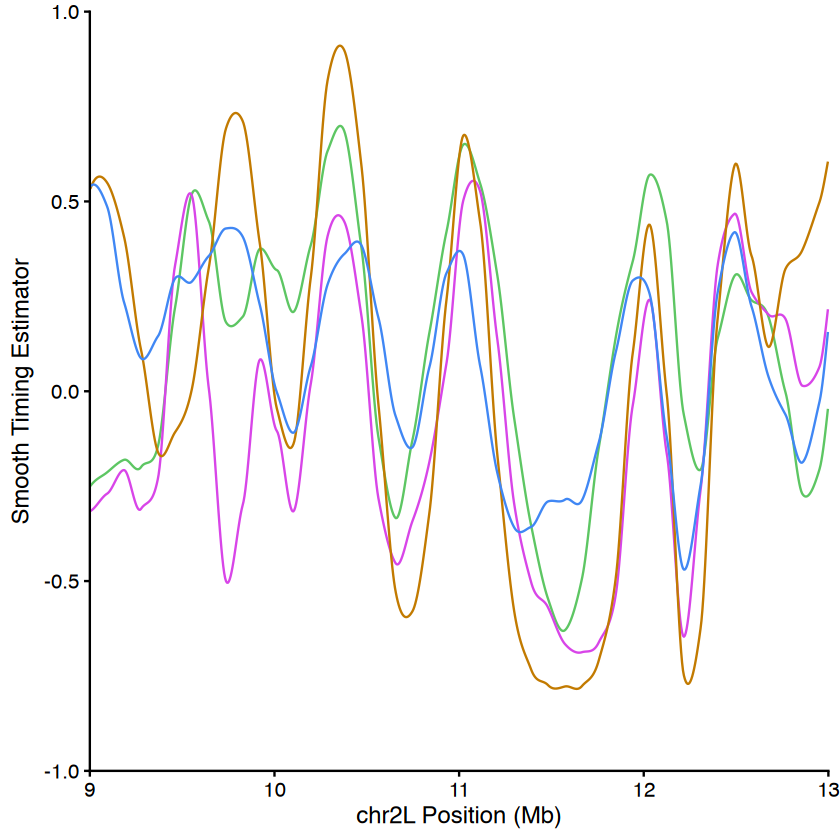

In [23]:
colors <- list(Germline=chic_line_track_colors$germline, Somatic=chic_line_track_colors$somatic, Kc167=hcl(50, 102, 57), S2=hcl(255, 102, 57))
library(cowplot)
library(ggplot2)
chr2L <- ggplot(
  subset(Y, chr == "2L" & between(x, 9*1000*1000, 13*1000*1000)),
  aes(x/1000/1000, Germline_LOESS)
) +
  coord_cartesian(c(9, 13), c(-1, 1), ex=F) +
  geom_line(aes(y=Germline_LOESS), color=colors$Germline) +
  geom_line(aes(y=Somatic_LOESS), color=colors$Somatic) +
  geom_line(aes(y=Kc167_LOESS), color=colors$Kc167) +
  geom_line(aes(y=S2_LOESS), color=colors$S2) +
  theme_cowplot() +
  labs(x = "chr2L Position (Mb)", y = "Smooth Timing Estimator")
chr2L

In [24]:
chromosome_pericetromere_label

GRanges object with 4 ranges and 0 metadata columns:
      seqnames            ranges strand
         <Rle>         <IRanges>  <Rle>
  [1]       2L 22192401-23513712      *
  [2]       2R         1-5651400      *
  [3]       3L 23154101-28110227      *
  [4]       3R         1-4229200      *
  -------
  seqinfo: 4 sequences from an unspecified genome; no seqlengths

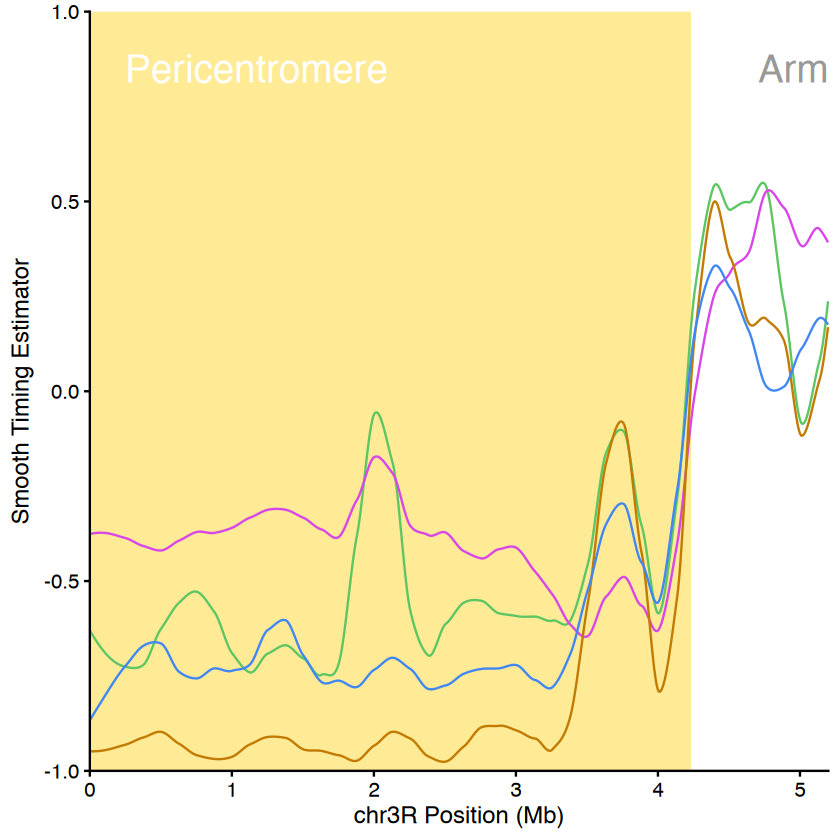

In [25]:
colors <- list(Germline=chic_line_track_colors$germline, Somatic=chic_line_track_colors$somatic, Kc167=hcl(50, 102, 57), S2=hcl(255, 102, 57))
library(cowplot)
library(ggplot2)
chr3RC <- ggplot(
  subset(Y, chr == "3R" & between(x, 1, 5.2*1000*1000)),
  aes(x/1000/1000, Germline_LOESS)
) +
  coord_cartesian(c(0, 5.2), c(-1, 1), ex=F) +
  annotate(
    "rect",
    xmin = 0,
    ymin = -1,
    xmax = 4.229,
    ymax = 1,
    fill = "#ffea96"
  ) +
  annotate("text", 0.25, 0.85, label = "Pericentromere", color = "white", hjust = 0, size = 8) +
  annotate("text", 5.2, 0.85, label = "Arm", color = "#999999", hjust = 1, size = 8) +
  geom_line(aes(y=Germline_LOESS), color=colors$Germline) +
  geom_line(aes(y=Somatic_LOESS), color=colors$Somatic) +
  geom_line(aes(y=Kc167_LOESS), color=colors$Kc167) +
  geom_line(aes(y=S2_LOESS), color=colors$S2) +
  theme_cowplot() +
  labs(x = "chr3R Position (Mb)", y = "Smooth Timing Estimator")
chr3RC

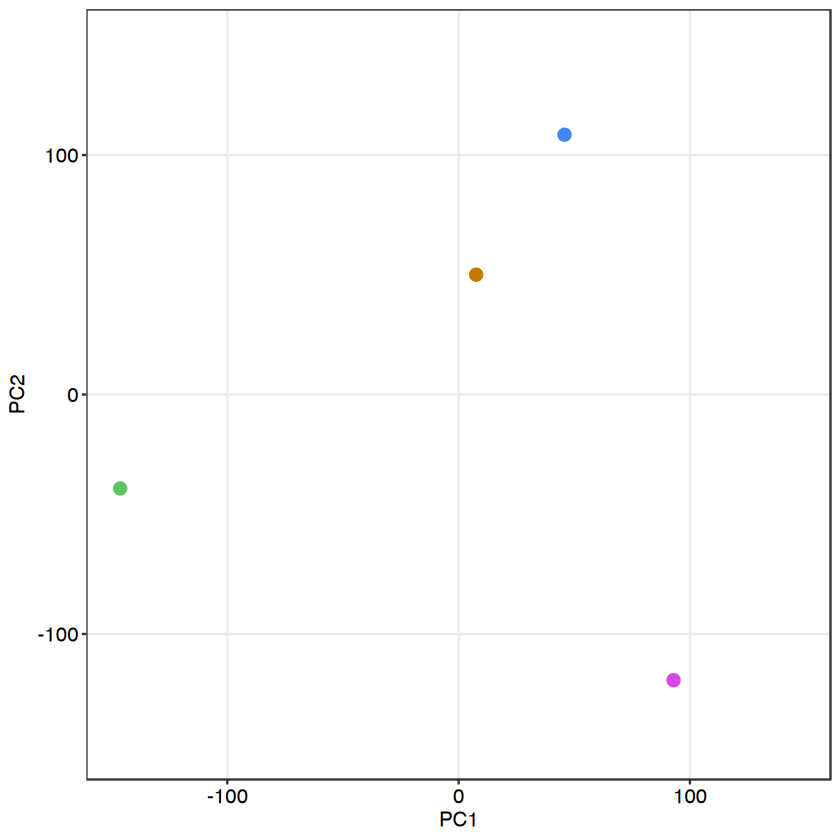

In [26]:
pca_plot <- ggplot(
  tibble(
    as_tibble(PCA$x),
    color = unlist(colors)
  ),
  aes(PC1, PC2, color=color)
) +
  geom_point(size = 3) +
  scale_color_identity() +
  scale_x_continuous(breaks = c(-100, 0, 100), minor_breaks = NULL) +
  scale_y_continuous(breaks = c(-100, 0, 100), minor_breaks = NULL) +
  coord_cartesian(
    range(c(PCA$x[,"PC1"], PCA$x[,"PC2"], -PCA$x[,"PC1"], -PCA$x[,"PC2"])),
    range(c(PCA$x[,"PC1"], PCA$x[,"PC2"], -PCA$x[,"PC1"], -PCA$x[,"PC2"])),
  ) +
  theme(
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 12),
  )
pca_plot

In [27]:
PCA$rotation[,1] %>% split(Y$region) %>% sapply(mean) %>% enframe

name,value
<chr>,<dbl>
2L,-4.042980e-04
2LC,-6.140097e-03
2RC,-5.888191e-04
2R,-2.056145e-04
3L,-8.441649e-06
3LC,-1.302965e-03
3RC,2.392501e-03
3R,-1.839929e-03
4,-4.495542e-03


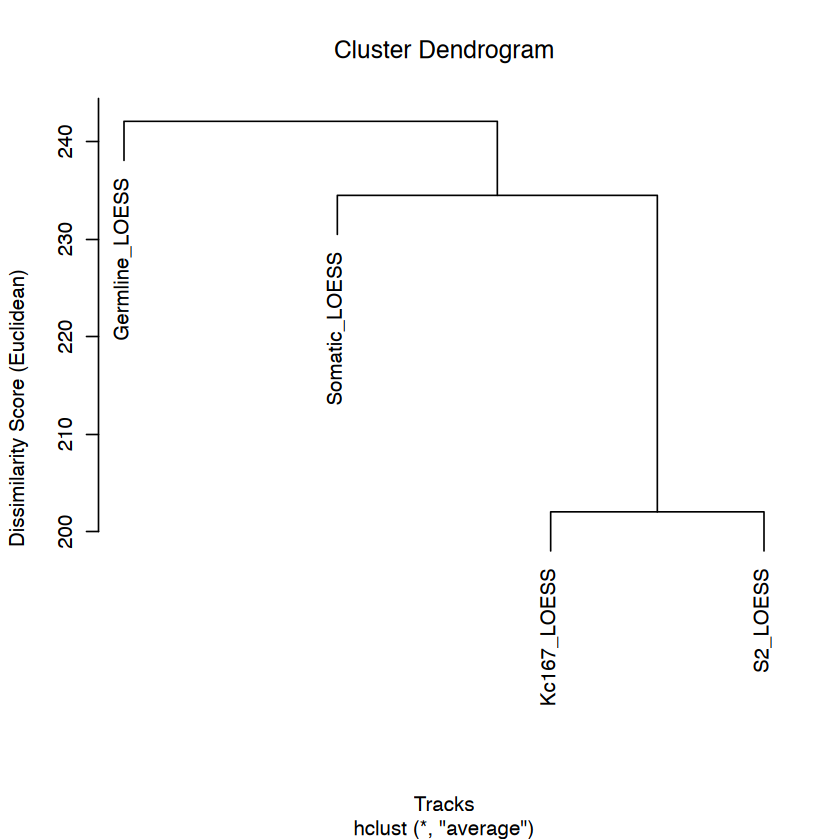

In [28]:
Euclidean <- dist(t(YS))
Clust <- ggplotify::as.grob(~ plot(hclust(Euclidean, "average"), xlab="Tracks", ylab="Dissimilarity Score (Euclidean)"))
plot(hclust(Euclidean, "average"), xlab="Tracks", ylab="Dissimilarity Score (Euclidean)")

# A tibble: 27,503 x 3
   region rows         x
   <fct>  <fct>    <dbl>
 1 2L     (0,4] -0.00409
 2 2L     (0,4] -0.00438
 3 2L     (0,4] -0.00466
 4 2L     (0,4] -0.00493
 5 2L     (0,4] -0.00519
 6 2L     (0,4] -0.00542
 7 2L     (0,4] -0.00563
 8 2L     (0,4] -0.00582
 9 2L     (0,4] -0.00597
10 2L     (0,4] -0.00611
# i 27,493 more rows


Warning message:
"Groups with fewer than two datapoints have been dropped.
i Set `drop = FALSE` to consider such groups for position adjustment purposes."


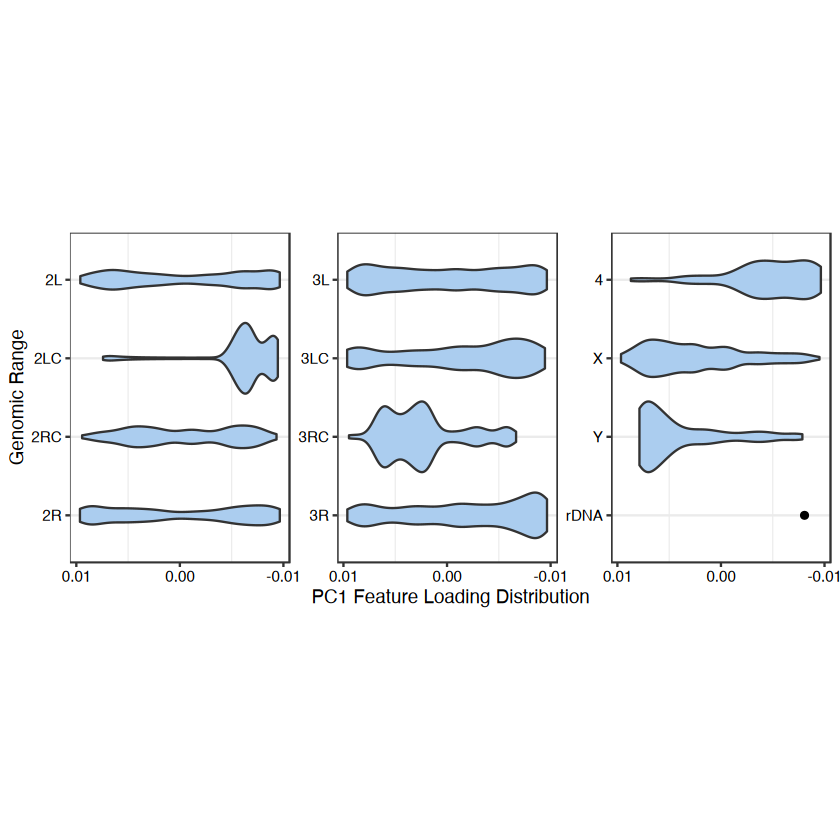

In [29]:
fl <- tibble(
  Y["region"],
  rows=cut(as.integer(Y$region), c(0, 4, 8, 12)),
  x = PCA$rotation[,1]
)
print(fl)
loading_plot <- ggplot(
  fl,
  aes(region, x)
) +
  facet_wrap(vars(rows), ncol=3, scales="free") +
  geom_violin(fill = "#abcdef") +
  geom_point(
    data = subset(fl, region == "rDNA")
  ) +
  scale_x_discrete(limits = rev) +
  scale_y_reverse(breaks = c(-0.01, 0, 0.01)) +
  labs(x = "Genomic Range", y = "PC1 Feature Loading Distribution") +
  coord_flip() +
  theme(
    aspect.ratio = 1.5,
    panel.grid.major.x = element_blank(),
    legend.position = "none",
    strip.background = element_blank(),
    strip.text = element_blank(),
  )
loading_plot

             Cell Type
Genomic Range Germline Somatic Kc167    S2
         2L       0.07   -0.03 -0.07  0.03
         2LC      0.71   -0.75  0.67 -0.64
         2RC      0.04    0.02  0.31 -0.37
         2R       0.00   -0.05  0.12 -0.07
         3L       0.00    0.05  0.07 -0.13
         3LC      0.14   -0.18  0.19 -0.14
         3RC     -0.14    0.99 -0.08 -0.77
         3R       0.25   -0.28 -0.04  0.07
         4        0.60   -0.27  0.42 -0.76
         X       -0.20    0.34 -0.54  0.40
         Y       -0.53    0.63  0.00 -0.10
         rDNA     1.35   -0.14 -0.13 -1.07


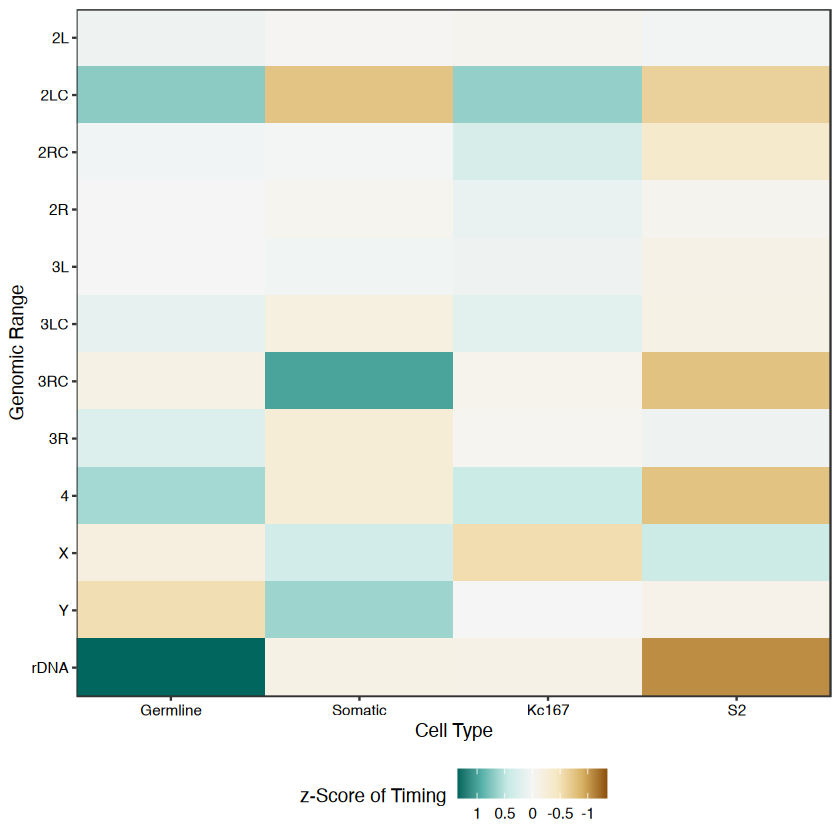

In [30]:
FEATURES <- YS %>%
  apply(
    2,
    \(v) v %>% split(Y$region) %>% sapply(mean)
  )
colnames(FEATURES) <- colnames(FEATURES) %>% str_replace("_LOESS", "")
names(dimnames(FEATURES)) <- c("Genomic Range", "Cell Type")
print(round(FEATURES, 2))
feature_plot <- ggplot(
  melt(FEATURES),
  aes(`Cell Type`, `Genomic Range`, fill=-round(value, 2))
) +
  geom_tile() +
  scale_y_discrete(limits=rev) +
  scale_fill_distiller(
    "z-Score of Timing", type = "div", limits=c(-1.35, 1.35), labels=`-`,
    guide = guide_colorbar(barwidth = unit(1.25, "in"), barheight = unit(0.25, "in"))
  ) +
  coord_cartesian(expand=F) +
  theme(
    legend.position = "bottom",
  )
feature_plot

In [31]:
cor(YS)

,Germline_LOESS,Somatic_LOESS,Kc167_LOESS,S2_LOESS
Germline_LOESS,1.0000000,-0.370017,-0.3122408,-0.4189079
Somatic_LOESS,-0.3700170,1.000000,-0.3524730,-0.3644290
Kc167_LOESS,-0.3122408,-0.352473,1.0000000,-0.1638103
S2_LOESS,-0.4189079,-0.364429,-0.1638103,1.0000000


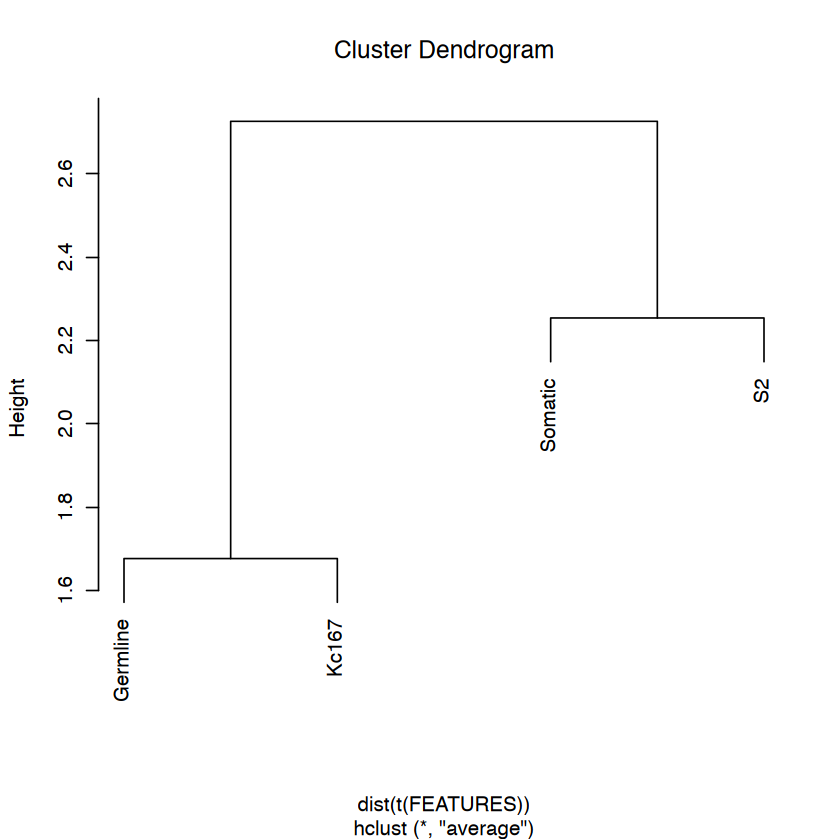

In [32]:
plot(hclust(dist(t(FEATURES)), "average"))

In [33]:
library(egg)
library(grid)
library(gtable)
pdf("illustrations/Fig6Panels.pdf", width=11, height=8.5)
grid.draw(
  cbind(
    set_panel_size(difftime_plot, w=unit(2,"in"), h=unit(2,"in")),
    set_panel_size(earlytime_plot, w=unit(2,"in"), h=unit(2,"in"))
  )
)
grid.newpage()
grid.draw(
  cbind(
    set_panel_size(chr2L, w=unit(4,"in"), h=unit(3,"in")),
    set_panel_size(chr3RC, w=unit(4,"in"), h=unit(3,"in"))
  )
)
grid.newpage()
grid.draw(
  gtable(unit(6, "in"), unit(6, "in")) %>%
    gtable_add_grob(Clust, 1, 1)
)
grid.newpage()
legend <- get_legend(
    ggplot(
      enframe(unlist(colors), "Cell Type", "x"),
      aes(x, y = 0, xend = 1000, yend = 1000, color = `Cell Type`)
    ) +
      geom_segment() +
      scale_color_manual(values=unlist(colors)) +
      theme(
        legend.text = element_text(size = 12)
      )
  )
grid.draw(
  gtable(
    w = unit(c(3.5, 3.5, 2), "in"),
    h = unit(c(3, 1, 3), "in")
  ) %>%
    gtable_add_grob(
      list(
        set_panel_size(
          tibble(
            x = c("PC1", "PC2", "PC3"),
            y = PCA$sdev[1:3]^2
          ) %>%
            ggplot(aes(x, y)) +
            geom_point(size = 5, color = "#abcdef") +
            scale_y_continuous(
              "Explained Variance",
              limits = c(0, 12000),
              labels = \(v) str_glue("{round(v/1000)}K")
            ) +
            coord_cartesian(
              c(0.5, 3.5),
              expand=F,
              clip="off"
            ) +
            theme_cowplot() +
            labs(
              x = NULL
            ),
          w=unit(2.5,"in"),
          h=unit(2.5,"in")
        ),
        set_panel_size(pca_plot, w=unit(2.5,"in"), h=unit(2.5,"in")),
        legend,
        set_panel_size(
          loading_plot,
          w=unit(1.1,"in"),
          h=unit(2.5,"in")
        )
      ),
      l = c(1, 2, 3, 1),
      t = c(1, 1, 1, 3),
      r = c(1, 2, 3, 3),
      b = c(1, 1, 1, 3)
    )
)
grid.newpage()
grid.draw(
  gtable(
    w = unit(c(5.5, 3.5), "in"),
    h = unit(7.5, "in")
  ) %>%
    gtable_add_grob(
      list(
        set_panel_size(
          feature_plot,
          w=unit(2,"in"),
          h=unit(4,"in")
        ),
        set_panel_size(
          ggplot(
            melt(cor(FEATURES)),
            aes(Var1, Var2, fill=value)
          ) +
            geom_tile() +
            scale_y_discrete(limits=rev) +
            coord_cartesian(expand=F) +
            scale_fill_gradient2(
              NULL, limits=c(-1, 1),
              low = "red", high = "blue"
            ) +
            labs(title = "Correlation of z-Scores", x=NULL, y=NULL),
          w=unit(2, "in"),
          h=unit(2, "in"),
        )
      ),
      l = 1:2,
      t = 1
    )
)
dev.off()

Loading required package: gridExtra


Attaching package: 'gridExtra'


The following object is masked from 'package:Biobase':

    combine


The following object is masked from 'package:BiocGenerics':

    combine


The following object is masked from 'package:dplyr':

    combine


Warning message in get_plot_component(plot, "guide-box"):
"Multiple components found; returning the first one. To return all, use `return_all = TRUE`."
Warning message:
"Groups with fewer than two datapoints have been dropped.
i Set `drop = FALSE` to consider such groups for position adjustment purposes."


pdf 
  2